In [1]:
%load_ext autoreload
%autoreload 1
%aimport run_example

In [5]:
from run_example import solve_pendulum
from utils import base_plot, EllipsoidTubeData2D, add_plot_trajectory
import matplotlib.pyplot as plt

## Inverted pendulum model

We model the inverted pendulum

$$
\dot{x} = f(x,u) = \begin{bmatrix} \dot{\theta} \\ \ddot{\theta} \end{bmatrix} = \begin{bmatrix} \dot{\theta} \\ -\sin(\theta) + u \end{bmatrix},
$$

which is to be controlled from the hanging-down resting position, $(\theta_0, \dot{\theta}_0) = (\pi, 0)$, to the upright position ($(\theta_r, \dot{\theta}_r) = (0,0)$), subject to the constraints that overshoot should be avoided, i.e.,

$$
\theta_{lb} \leq \theta \leq \theta_{ub}.
$$

The model setup and controller definition can be found in the functions `export_simplependulum_ode_model()`, `export_ocp_nominal()` in the `inverted_pendulum_model_acados.py` file.

In [3]:
X_zoro_acados, U_zoro_acados, P_zoro_acados = solve_pendulum("zoro_acados")
X_zoro_cupdate, U_zoro_cupdate, P_zoro_cupdate = solve_pendulum(
    "zoro_acados_custom_update"
)
X_zero_order_gpmpc, U_zero_order_gpmpc, P_zero_order_gpmpc = solve_pendulum(
    "zero_order_gpmpc"
)

rm: cannot remove './jit_*.c': No such file or directory
rm: cannot remove './tmp_casadi_*': No such file or directory


 If there is an incompatibility with the CasADi generated code, please consider changing your CasADi version.
Version 3.6.5 currently in use.
rm -f libacados_ocp_solver_simplependulum_ode_ocp_init.so
rm -f simplependulum_ode_ocp_init_constraints/simplependulum_ode_ocp_init_constr_h_fun_jac_uxt_zt.o simplependulum_ode_ocp_init_constraints/simplependulum_ode_ocp_init_constr_h_fun.o acados_solver_simplependulum_ode_ocp_init.o
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/acados/include -I/home/amon/Repositories/acados/include/acados -I/home/amon/Repositories/acados/include/blasfeo/include -I/home/amon/Repositories/acados/include/hpipm/include  -c -o simplependulum_ode_ocp_init_constraints/simplependulum_ode_ocp_init_constr_h_fun_jac_uxt_zt.o simplependulum_ode_ocp_init_constraints/simplependulum_ode_ocp_init_constr_h_fun_jac_uxt_zt.c
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/acados/include -I/home/amon/Repositories/acados/include/acados -I/home/amon/Repositories/acados/include

rm: cannot remove './jit_*.c': No such file or directory
rm: cannot remove './tmp_casadi_*': No such file or directory


 If there is an incompatibility with the CasADi generated code, please consider changing your CasADi version.
Version 3.6.5 currently in use.
rm -f libacados_ocp_solver_simplependulum_ode_ocp_init.so
rm -f simplependulum_ode_ocp_init_constraints/simplependulum_ode_ocp_init_constr_h_fun_jac_uxt_zt.o simplependulum_ode_ocp_init_constraints/simplependulum_ode_ocp_init_constr_h_fun.o acados_solver_simplependulum_ode_ocp_init.o
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/acados/include -I/home/amon/Repositories/acados/include/acados -I/home/amon/Repositories/acados/include/blasfeo/include -I/home/amon/Repositories/acados/include/hpipm/include  -c -o simplependulum_ode_ocp_init_constraints/simplependulum_ode_ocp_init_constr_h_fun_jac_uxt_zt.o simplependulum_ode_ocp_init_constraints/simplependulum_ode_ocp_init_constr_h_fun_jac_uxt_zt.c
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/acados/include -I/home/amon/Repositories/acados/include/acados -I/home/amon/Repositories/acados/include

rm: cannot remove './jit_*.c': No such file or directory
rm: cannot remove './tmp_casadi_*': No such file or directory


 If there is an incompatibility with the CasADi generated code, please consider changing your CasADi version.
Version 3.6.5 currently in use.
rm -f libacados_ocp_solver_simplependulum_ode_ocp_init.so
rm -f simplependulum_ode_ocp_init_constraints/simplependulum_ode_ocp_init_constr_h_fun_jac_uxt_zt.o simplependulum_ode_ocp_init_constraints/simplependulum_ode_ocp_init_constr_h_fun.o acados_solver_simplependulum_ode_ocp_init.o
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/acados/include -I/home/amon/Repositories/acados/include/acados -I/home/amon/Repositories/acados/include/blasfeo/include -I/home/amon/Repositories/acados/include/hpipm/include  -c -o simplependulum_ode_ocp_init_constraints/simplependulum_ode_ocp_init_constr_h_fun_jac_uxt_zt.o simplependulum_ode_ocp_init_constraints/simplependulum_ode_ocp_init_constr_h_fun_jac_uxt_zt.c
cc -fPIC -std=c99   -O2 -I/home/amon/Repositories/acados/include -I/home/amon/Repositories/acados/include/acados -I/home/amon/Repositories/acados/include

## Plot results

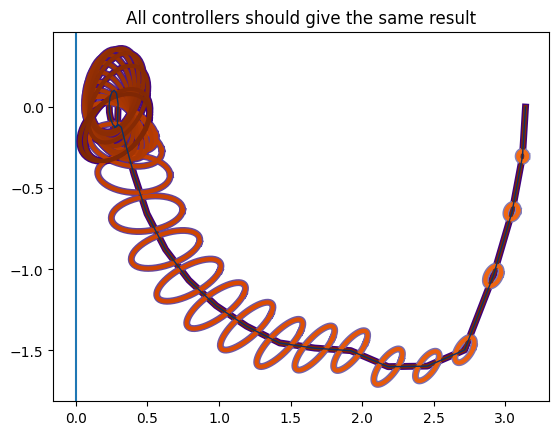

In [12]:
lb_theta = 0.0
fig, ax = base_plot(lb_theta=lb_theta)

plot_data_zoro_acados = EllipsoidTubeData2D(
    center_data=X_zoro_acados, ellipsoid_data=P_zoro_acados
)
plot_data_zoro_cupdate = EllipsoidTubeData2D(
    center_data=X_zoro_cupdate, ellipsoid_data=P_zoro_cupdate
)
plot_data_zero_order_gpmpc = EllipsoidTubeData2D(
    center_data=X_zero_order_gpmpc, ellipsoid_data=P_zero_order_gpmpc
)
add_plot_trajectory(ax, plot_data_zoro_acados, color_fun=plt.cm.Purples, linewidth=5)
add_plot_trajectory(ax, plot_data_zoro_cupdate, color_fun=plt.cm.Oranges, linewidth=3)
add_plot_trajectory(ax, plot_data_zero_order_gpmpc, color_fun=plt.cm.Blues, linewidth=1)

plt.title("All controllers should give the same result")

plt.show()